In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
train_knight = pd.read_csv('./knights/Train_knight.csv')
test_knight = pd.read_csv('./knights/Test_knight.csv')

In [203]:
features = test_knight.columns
features

Index(['Sensitivity', 'Hability', 'Strength', 'Power', 'Agility', 'Dexterity',
       'Awareness', 'Prescience', 'Reactivity', 'Midi-chlorien', 'Slash',
       'Push', 'Pull', 'Lightsaber', 'Survival', 'Repulse', 'Friendship',
       'Blocking', 'Deflection', 'Mass', 'Recovery', 'Evade', 'Stims',
       'Sprint', 'Combo', 'Delay', 'Attunement', 'Empowered', 'Burst',
       'Grasping'],
      dtype='object')

In [204]:
len(features)

30

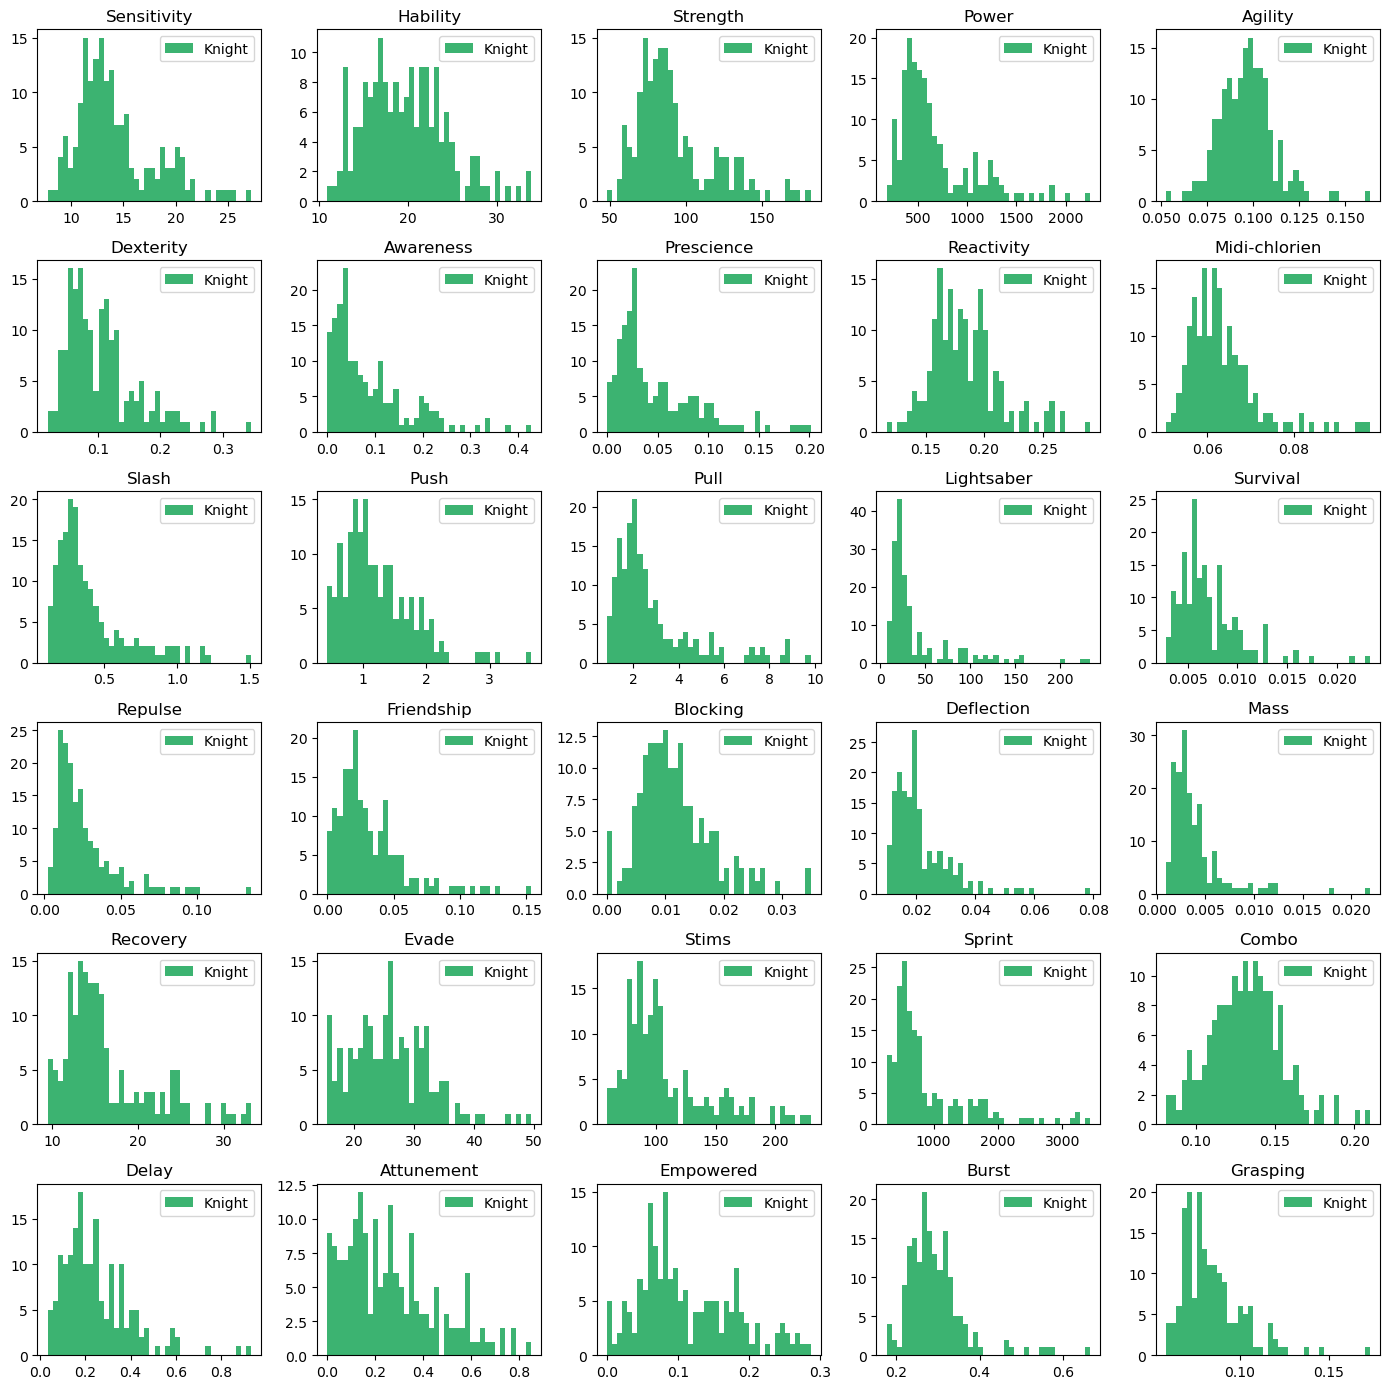

In [205]:
fig, axs = plt.subplots(6, 5, figsize=(14, 14))
for idx, ax in enumerate(axs.flat):
    ax.hist(test_knight[features[idx]], bins=40, color='mediumseagreen', label='Knight')
    ax.legend()
    ax.set_title(f'{features[idx]}')
plt.tight_layout()
plt.show()

In [206]:
features = train_knight.columns

In [207]:
train_knight.head()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121,Sith
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.094980,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.31500,0.53720,0.23880,0.2768,0.07615,Jedi
2,10.97,17.20,71.73,371.5,0.08915,0.11130,0.094570,0.036130,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.40820,0.47790,0.15550,0.2540,0.09532,Sith
3,11.62,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,...,25.40,88.14,528.1,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270,Sith
4,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613,Sith


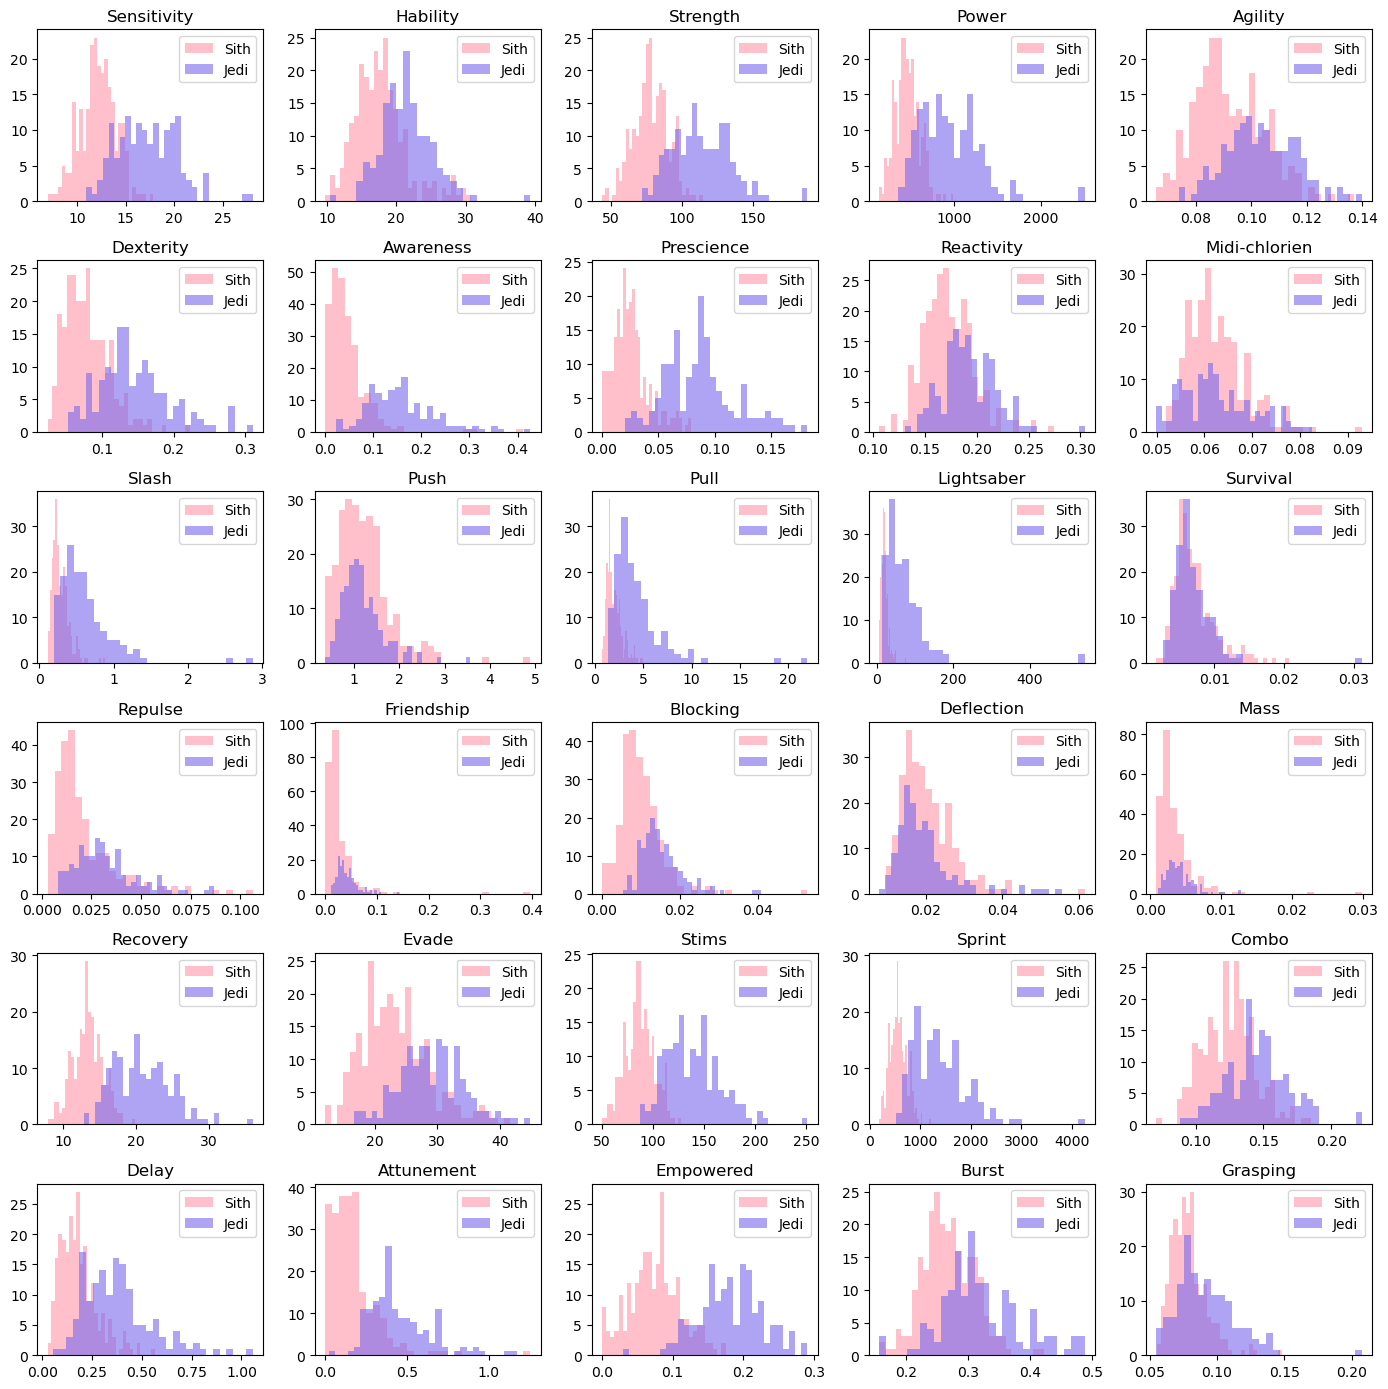

In [208]:
fig, axs = plt.subplots(6, 5, figsize=(14, 14))
for idx, ax in enumerate(axs.flat):
    ax.hist(train_knight[train_knight['knight'] == 'Sith'][features[idx]], label='Sith', bins=30, color='pink')
    ax.hist(train_knight[train_knight['knight'] == 'Jedi'][features[idx]], label='Jedi', bins=30, color='mediumslateblue', alpha=0.6)
    ax.legend()
    ax.set_title(f'{features[idx]}')
plt.tight_layout()
plt.show()

### Ex01

In [209]:
train_knight.head()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121,Sith
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.094980,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.31500,0.53720,0.23880,0.2768,0.07615,Jedi
2,10.97,17.20,71.73,371.5,0.08915,0.11130,0.094570,0.036130,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.40820,0.47790,0.15550,0.2540,0.09532,Sith
3,11.62,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,...,25.40,88.14,528.1,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270,Sith
4,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613,Sith


In [211]:
train_knight_copy = train_knight.copy()

In [212]:
train_knight_copy['knight'] = train_knight_copy['knight'].astype('category').cat.codes

correlation_matrix = train_knight_copy.corr()
knight_correlation = correlation_matrix['knight']

sorted_correlations = knight_correlation.abs().sort_values(ascending=False)

sorted_correlations

knight           1.000000
Empowered        0.793652
Prescience       0.790066
Stims            0.786797
Recovery         0.777633
Sprint           0.739672
Strength         0.737403
Sensitivity      0.721566
Power            0.700709
Awareness        0.699662
Attunement       0.648893
Dexterity        0.631987
Delay            0.598072
Slash            0.550663
Pull             0.537800
Lightsaber       0.515340
Evade            0.465605
Hability         0.446632
Burst            0.445847
Combo            0.445223
Blocking         0.421950
Agility          0.397458
Reactivity       0.375103
Grasping         0.350105
Repulse          0.324399
Friendship       0.236633
Mass             0.113185
Survival         0.043099
Deflection       0.026489
Push             0.019446
Midi-chlorien    0.008132
Name: knight, dtype: float64